In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [31]:
crime_df = pd.read_csv('data/SPD_Crime_Data__2008-Present_20240704.csv')


In [32]:
crime_df.columns = crime_df.columns.str.lower().str.strip().str.replace(' ','_')
crime_df['offense_start_datetime'] = pd.to_datetime(crime_df['offense_start_datetime'])
crime_df['report_datetime'] = pd.to_datetime(crime_df['report_datetime'])
crime_df.dropna(subset=['mcpp', 'offense_start_datetime'], inplace=True)
crime_df.drop_duplicates(inplace=True)  
crime_df['offense'] = crime_df['offense'].str.lower()
crime_df['year'] = crime_df['offense_start_datetime'].dt.year
crime_df['month'] = crime_df['offense_start_datetime'].dt.month

In [33]:
crime_df

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude,year,month
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,2020-02-05 11:24:31,A,SOCIETY,DRUG/NARCOTIC OFFENSES,drug/narcotic violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,PROPERTY,LARCENY-THEFT,theft of motor vehicle parts or accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,PROPERTY,ROBBERY,robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,destruction/damage/vandalism of property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,2020-02-05 00:51:31,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128967,2013-247888,7687554356,2013-07-13 01:00:00,NaN,2013-07-13 06:37:00,A,PROPERTY,MOTOR VEHICLE THEFT,motor vehicle theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702,2013,7
1128968,2013-227022,7682354808,2013-06-26 11:00:00,06/29/2013 06:30:00 AM,2013-06-29 09:43:00,A,PROPERTY,MOTOR VEHICLE THEFT,motor vehicle theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013,6
1128969,2012-045494,7672915592,2012-02-14 15:04:00,NaN,2012-02-14 15:04:00,A,PROPERTY,LARCENY-THEFT,shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894,2012,2
1128970,2010-328592,7692227482,2010-09-19 16:59:00,NaN,2010-09-19 16:59:00,A,PROPERTY,LARCENY-THEFT,shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909,2010,9


In [34]:
#filter catogary society
society_crime = crime_df[crime_df['crime_against_category'] == 'SOCIETY']
# sort by mcpp and year
society_crime_sorted = society_crime.sort_values(by=['mcpp', 'year'])

In [35]:
society_crime_sorted.head()

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude,year,month
247976,2014-275896,7698627009,2003-10-24 00:00:00,02/28/2012 11:00:00 PM,2014-08-22 10:32:00,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","family offenses, nonviolent",90F,SW,W,W2,ALASKA JUNCTION,NaN,0.000000,0.000000,2003,10
350048,2012-151694,7693383542,2005-01-01 11:00:00,01/31/2012 12:00:00 PM,2012-05-17 08:01:00,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","family offenses, nonviolent",90F,SW,W,W2,ALASKA JUNCTION,NaN,0.000000,0.000000,2005,1
404662,2011-015880,7629663528,2007-01-01 00:00:00,12/31/2007 12:00:00 AM,2011-01-14 10:59:00,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","family offenses, nonviolent",90F,SW,W,W2,ALASKA JUNCTION,NaN,0.000000,0.000000,2007,1
497518,2008-474701,7674101644,2008-12-23 02:07:00,NaN,2008-12-23 02:07:00,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,SW,W,W2,ALASKA JUNCTION,47XX BLOCK OF CALIFORNIA AVE SW,-122.386804,47.560216,2008,12
497742,2008-471647,7643640369,2008-12-19 22:24:00,NaN,2008-12-19 22:24:00,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,SW,W,W2,ALASKA JUNCTION,SW EDMUNDS ST / CALIFORNIA AVE SW,-122.386830,47.559325,2008,12


In [39]:
offense_counts = society_crime_sorted.groupby(['mcpp', 'year', 'offense']).size().reset_index(name='count')
society_crime_sorted_with_counts = pd.merge(society_crime_sorted, offense_counts, on=['mcpp', 'year', 'offense'], how='left')


In [40]:
society_crime_sorted_with_counts

,report_number,offense_id,offense_start_datetime,offense_end_datetime,report_datetime,group_a_b,crime_against_category,offense_parent_group,offense,offense_code,precinct,sector,beat,mcpp,100_block_address,longitude,latitude,year,month,count
0,2014-275896,7698627009,2003-10-24 00:00:00,02/28/2012 11:00:00 PM,2014-08-22 10:32:00,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","family offenses, nonviolent",90F,SW,W,W2,ALASKA JUNCTION,NaN,0.000000,0.000000,2003,10,1
1,2012-151694,7693383542,2005-01-01 11:00:00,01/31/2012 12:00:00 PM,2012-05-17 08:01:00,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","family offenses, nonviolent",90F,SW,W,W2,ALASKA JUNCTION,NaN,0.000000,0.000000,2005,1,1
2,2011-015880,7629663528,2007-01-01 00:00:00,12/31/2007 12:00:00 AM,2011-01-14 10:59:00,B,SOCIETY,"FAMILY OFFENSES, NONVIOLENT","family offenses, nonviolent",90F,SW,W,W2,ALASKA JUNCTION,NaN,0.000000,0.000000,2007,1,1
3,2008-474701,7674101644,2008-12-23 02:07:00,NaN,2008-12-23 02:07:00,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,SW,W,W2,ALASKA JUNCTION,47XX BLOCK OF CALIFORNIA AVE SW,-122.386804,47.560216,2008,12,40
4,2008-471647,7643640369,2008-12-19 22:24:00,NaN,2008-12-19 22:24:00,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,SW,W,W2,ALASKA JUNCTION,SW EDMUNDS ST / CALIFORNIA AVE SW,-122.386830,47.559325,2008,12,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112667,2024-162631,56872080286,2024-06-15 01:51:00,06/15/2024 01:51:00 AM,2024-06-15 03:40:51,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,N,B,B3,WALLINGFORD,N 45TH ST / BURKE AVE N,-122.335072,47.661386,2024,6,5
112668,2024-165052,56898234356,2024-06-17 17:17:00,NaN,2024-06-17 19:36:16,A,SOCIETY,WEAPON LAW VIOLATIONS,weapon law violations,520,N,B,B3,WALLINGFORD,N 44TH ST / SUNNYSIDE AVE N,-122.330178,47.660281,2024,6,4
112669,2024-157792,56714160365,2024-06-10 13:00:00,NaN,2024-06-10 14:13:11,A,SOCIETY,PORNOGRAPHY/OBSCENE MATERIAL,pornography/obscene material,370,N,B,B3,WALLINGFORD,44XX BLOCK OF INTERLAKE AVE N,-122.340676,47.660316,2024,6,1
112670,2024-176546,57197831397,2024-06-28 15:16:00,NaN,2024-06-28 19:07:09,B,SOCIETY,DRIVING UNDER THE INFLUENCE,driving under the influence,90D,N,B,B3,WALLINGFORD,43XX BLOCK OF STONE WAY N,-122.342237,47.659571,2024,6,5


In [55]:
society_crime_sorted_with_counts['offense'].unique()

array(['family offenses, nonviolent', 'driving under the influence',
       'drug/narcotic violations', 'weapon law violations',
       'liquor law violations', 'drug equipment violations',
       'prostitution', 'peeping tom', 'trespass of real property',
       'assisting or promoting prostitution',
       'pornography/obscene material',
       'curfew/loitering/vagrancy violations', 'animal cruelty',
       'drunkenness', 'purchasing prostitution',
       'operating/promoting/assisting gambling', 'betting/wagering',
       'gambling equipment violation'], dtype=object)

In [54]:
society_crime_sorted_with_counts.to_csv('society_reports.csv')

In [45]:
print(society_crime_sorted_with_counts['mcpp'].unique())
print(society_crime_sorted_with_counts['year'].unique())
print(society_crime_sorted_with_counts['offense'].unique())

['ALASKA JUNCTION' 'ALKI' 'BALLARD NORTH' 'BALLARD SOUTH' 'BELLTOWN'
 'BITTERLAKE' 'BRIGHTON/DUNLAP' 'CAPITOL HILL' 'CENTRAL AREA/SQUIRE PARK'
 'CHINATOWN/INTERNATIONAL DISTRICT' 'CLAREMONT/RAINIER VISTA'
 'COLUMBIA CITY' 'COMMERCIAL DUWAMISH' 'COMMERCIAL HARBOR ISLAND'
 'DOWNTOWN COMMERCIAL' 'EASTLAKE - EAST' 'EASTLAKE - WEST' 'FAUNTLEROY SW'
 'FIRST HILL' 'FREMONT' 'GENESEE' 'GEORGETOWN' 'GREENWOOD' 'HIGH POINT'
 'HIGHLAND PARK' 'HILLMAN CITY' 'JUDKINS PARK/NORTH BEACON HILL'
 'LAKECITY' 'LAKEWOOD/SEWARD PARK' 'MADISON PARK' 'MADRONA/LESCHI'
 'MAGNOLIA' 'MID BEACON HILL' 'MILLER PARK' 'MONTLAKE/PORTAGE BAY'
 'MORGAN' 'MOUNT BAKER' 'NEW HOLLY' 'NORTH ADMIRAL' 'NORTH BEACON HILL'
 'NORTH DELRIDGE' 'NORTHGATE' 'PHINNEY RIDGE' 'PIGEON POINT'
 'PIONEER SQUARE' 'QUEEN ANNE' 'RAINIER BEACH' 'RAINIER VIEW'
 'ROOSEVELT/RAVENNA' 'ROXHILL/WESTWOOD/ARBOR HEIGHTS' 'SANDPOINT'
 'SLU/CASCADE' 'SODO' 'SOUTH BEACON HILL' 'SOUTH DELRIDGE' 'SOUTH PARK'
 'UNIVERSITY' 'UNKNOWN' 'WALLINGFORD']
[2003 2005 

    report_number   offense_id offense_start_datetime    offense_end_datetime  \
708   2019-479759  12119805843    2019-12-28 22:51:00  12/28/2019 10:59:00 PM   
709   2019-475559  12115342234    2019-12-25 01:00:00                     NaN   
710   2019-458902  12079421980    2019-12-12 02:48:00  12/12/2019 02:48:00 AM   
711   2019-455566  12059691289    2019-12-04 00:00:00  12/04/2019 11:59:00 PM   
712   2019-437810  11892028143    2019-11-24 23:41:09                     NaN   

        report_datetime group_a_b crime_against_category  \
708 2019-12-29 01:28:20         B                SOCIETY   
709 2019-12-25 02:33:56         B                SOCIETY   
710 2019-12-12 18:54:35         B                SOCIETY   
711 2019-12-09 14:36:09         B                SOCIETY   
712 2019-11-25 02:13:27         B                SOCIETY   

            offense_parent_group                      offense offense_code  \
708  DRIVING UNDER THE INFLUENCE  driving under the influence          90D

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


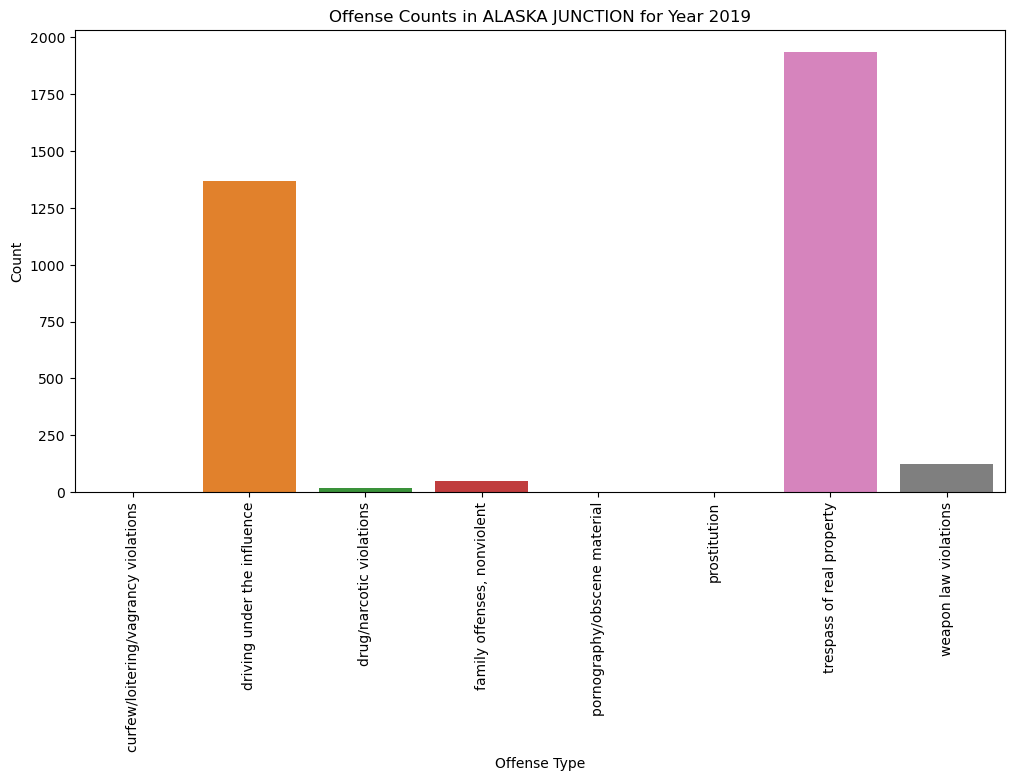

In [53]:
# Beispiel: Balkendiagramm für eine bestimmte Nachbarschaft und ein Jahr
neighborhood = 'ALASKA JUNCTION'
year = 2019

# Filtere die Daten
filtered_data = society_crime_sorted_with_counts[(society_crime_sorted_with_counts['mcpp'] == neighborhood) & (society_crime_sorted_with_counts['year'] == year)]

# Überprüfe die gefilterten Daten
print(filtered_data.head())

# Zähle die Offense-Arten
offense_summary = filtered_data.groupby('offense')['count'].sum().reset_index()

# Überprüfe das aggregierte Ergebnis
print(offense_summary.head())

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='offense', y='count', data=offense_summary)
plt.xticks(rotation=90)
plt.title(f'Offense Counts in {neighborhood} for Year {year}')
plt.xlabel('Offense Type')
plt.ylabel('Count')
plt.show()


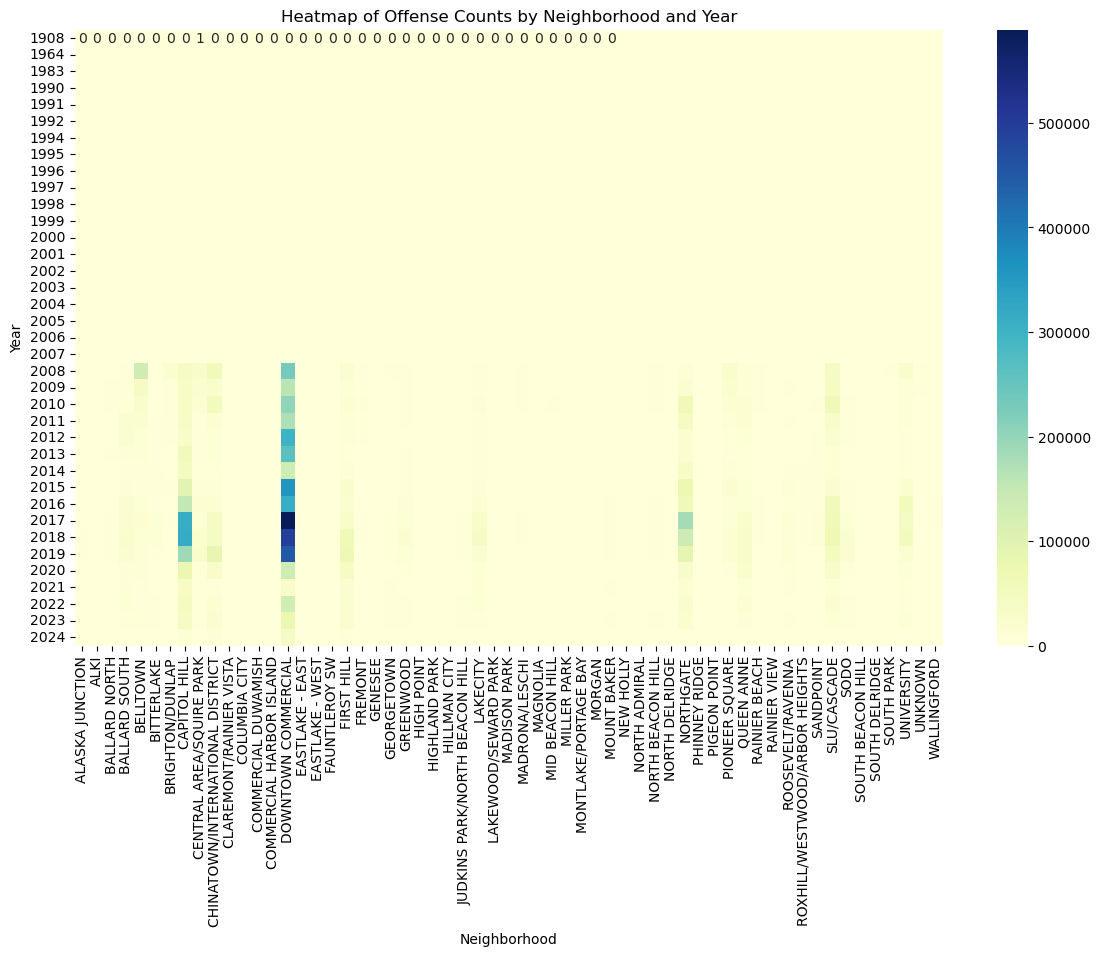

In [41]:
# Pivot-Tabelle für die Heatmap
heatmap_data = society_crime_sorted_with_counts.pivot_table(index='year', columns='mcpp', values='count', aggfunc='sum', fill_value=0)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Offense Counts by Neighborhood and Year')
plt.xlabel('Neighborhood')
plt.ylabel('Year')
plt.show()

In [50]:
# Beispiel: Testen mit einem allgemeinen Jahr und Offense-Art
test_year = 2008
test_offense = 'DRIVING UNDER THE INFLUENCE'

# Filtere die Daten
test_data = society_crime_sorted_with_counts[(society_crime_sorted_with_counts['year'] == test_year) & (society_crime_sorted_with_counts['offense'] == test_offense)]

# Überprüfe die gefilterten Daten
print(test_data.head())


Empty DataFrame
Columns: [report_number, offense_id, offense_start_datetime, offense_end_datetime, report_datetime, group_a_b, crime_against_category, offense_parent_group, offense, offense_code, precinct, sector, beat, mcpp, 100_block_address, longitude, latitude, year, month, count]
Index: []


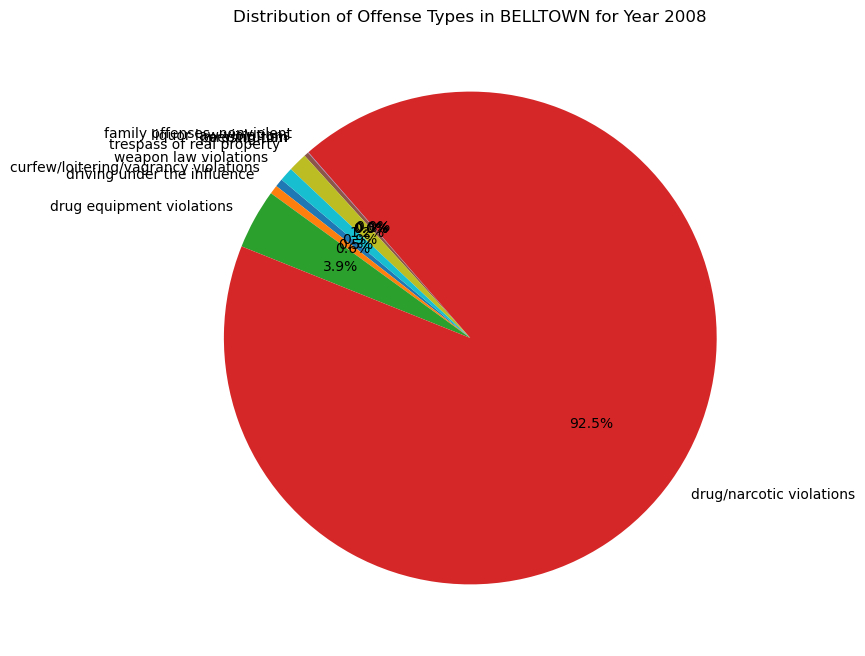

In [56]:
neighborhood = 'BELLTOWN'
year = 2008

# Filtere die Daten
filtered_data = society_crime_sorted_with_counts[(society_crime_sorted_with_counts['mcpp'] == neighborhood) & (society_crime_sorted_with_counts['year'] == year)]

# Zähle die Offense-Arten
offense_summary = filtered_data.groupby('offense')['count'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(offense_summary['count'], labels=offense_summary['offense'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Offense Types in {neighborhood} for Year {year}')
plt.show()

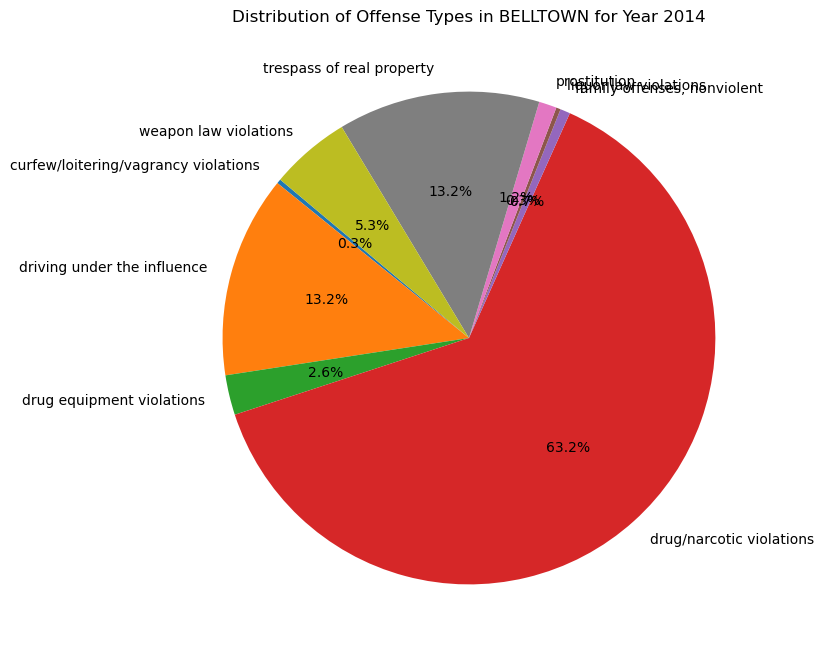

In [57]:
neighborhood = 'BELLTOWN'
year = 2014

# Filtere die Daten
filtered_data = society_crime_sorted_with_counts[(society_crime_sorted_with_counts['mcpp'] == neighborhood) & (society_crime_sorted_with_counts['year'] == year)]

# Zähle die Offense-Arten
offense_summary = filtered_data.groupby('offense')['count'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(offense_summary['count'], labels=offense_summary['offense'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Offense Types in {neighborhood} for Year {year}')
plt.show()

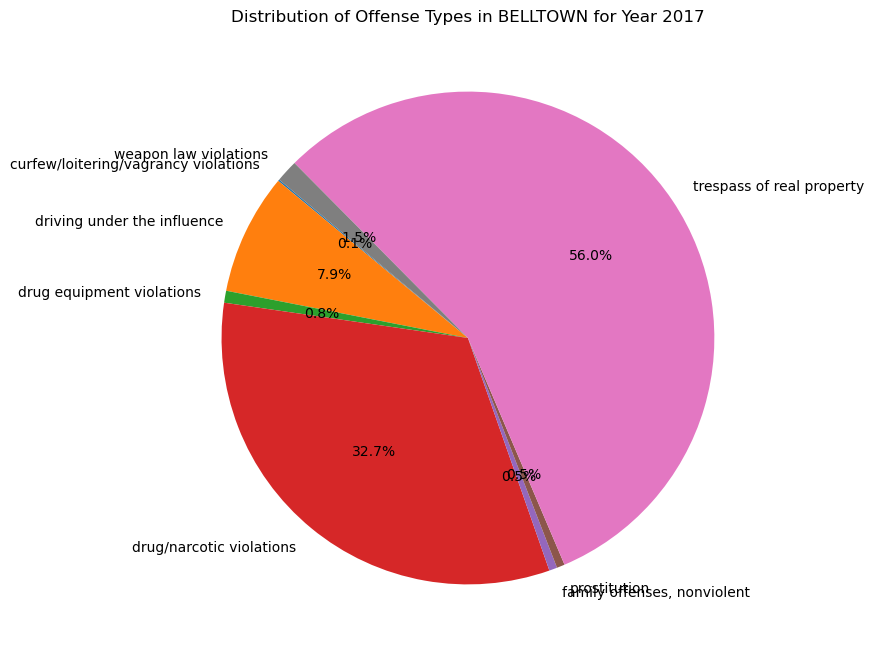

In [58]:
neighborhood = 'BELLTOWN'
year = 2017

# Filtere die Daten
filtered_data = society_crime_sorted_with_counts[(society_crime_sorted_with_counts['mcpp'] == neighborhood) & (society_crime_sorted_with_counts['year'] == year)]

# Zähle die Offense-Arten
offense_summary = filtered_data.groupby('offense')['count'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(offense_summary['count'], labels=offense_summary['offense'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Offense Types in {neighborhood} for Year {year}')
plt.show()